In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.interpolate import interp1d

In [3]:
from joblib import Parallel, delayed

In [4]:
loss = pd.read_csv('../results/agg_losses-all_25.csv', index_col=0,
                   header=0, usecols=[0,4],
                   names=['eid', 'losses'])

events = pd.read_csv('../results/aftershock_ruptures.csv', index_col=0)

In [5]:
eqs = events.join(loss).fillna(0)

In [6]:
mains = eqs.loc[eqs.aid == 0,:]
mains.index = mains.mainshock
afts = eqs.loc[eqs.aid != 0,:]

In [7]:
eq_dates = pd.read_csv('../data/puget_lowland_mean_eq_ages.csv')

In [8]:
mains

,aid,mainshock,mag,lon,lat,depth,day,losses
mainshock,,,,,,,,
Birch_Bay_Uplift,0,Birch_Bay_Uplift,6.888394,-122.973765,48.842685,9.899495,0.0,3.307010e+08
smf_E3,0,smf_E3,7.040799,-123.205373,47.510866,10.125553,0.0,1.006280e+08
crane_lake_eq_1,0,crane_lake_eq_1,6.822074,-122.475853,47.555052,10.336619,0.0,3.404400e+09
SFZ_EQ_A,0,SFZ_EQ_A,6.711235,-122.486680,47.500006,9.899495,0.0,4.681910e+09
kendall_EQB,0,kendall_EQB,6.522146,-122.001308,48.831629,9.899495,0.0,1.462590e+07
crane_lake_eq_2,0,crane_lake_eq_2,6.714995,-122.475853,47.555052,10.336619,0.0,3.107620e+09
DDMFZ_EQ1,0,DDMFZ_EQ1,7.291294,-122.485690,48.423278,10.392305,0.0,6.856890e+08
kendall_EQC,0,kendall_EQC,6.439627,-122.001308,48.831629,9.899495,0.0,1.126970e+07
frigid_EQ_1,0,frigid_EQ_1,6.318581,-123.259852,47.438094,9.969386,0.0,7.200270e+06


In [9]:
eq_dates

,mainshock,year_bp
0,Utsalady_EQ2,384.780600
1,Birch_Bay_Uplift,645.201985
2,SFZ_EQE,748.643246
3,kendall_EQC,820.859446
4,SFZ_EQ_D,964.109045
5,TFZ_EQ,1039.587468
6,West_Point_Sewer_Log_Death,1039.605343
7,RSC5_Death,1086.524339
8,smf_E3,1097.048712
9,SFZ_EQ_C,1269.606613


In [10]:
afts.tail()

,aid,mainshock,mag,lon,lat,depth,day,losses
eid,,,,,,,,
2312,30,Utsalady_EQ1,4.996657,-122.639470,48.402674,11.126155,0.0,1742330.0
2313,31,Utsalady_EQ1,4.792326,-122.610061,48.276222,16.372618,0.0,372895.0
2314,32,Utsalady_EQ1,5.017402,-122.484511,48.290831,7.274301,4.0,1201460.0
2315,33,Utsalady_EQ1,5.482194,-122.727451,48.380298,7.976653,7.0,8363960.0
2316,34,Utsalady_EQ1,4.916765,-122.703361,48.263309,12.292316,8.0,528698.0


In [11]:
def cal_yr_to_day(yr):
    return np.round(yr * 365.25)


def year_bp_to_cal_year(year_bp):
    return 1950 - year_bp


def get_eq_days(eq_dates, year_bp=True):
    if year_bp == True:
        eq_dates['cal_year'] = year_bp_to_cal_year(eq_dates['year_bp'])

    eq_dates['day'] = np.int_(np.round(eq_dates.cal_year * 365.25))

    return eq_dates


def get_mainshock_days(main_df, eq_dates):
    
    main_df['cal_day'] = pd.Series(eq_dates.day.values, 
                          index=eq_dates.mainshock)#,dtype='int')

    main_df.cal_day.fillna(0, inplace=True)

    main_df['cal_day'] = np.int_(main_df.cal_day)
    
    return main_df


def get_aftershock_days(aft_df, main_df):
    
    aft_df['cal_day'] = 0
    
    for ms in afts.mainshock.unique():
        md = mains.loc[ms, 'day']
        
        ms_idx = (aft_df['mainshock'] == ms)
        
        aft_df.loc[ms_idx, 'cal_day'] = np.int_(np.round(md + aft_df.loc[ms_idx, 'day']))
        
    return aft_df


def make_day_df(yr_start=-11000, yr_end=1700):
    day_df = pd.DataFrame(index=np.arange(int(yr_start * 365.25), 
                                          int(yr_end * 365.25)),
                          columns=['mainshock_losses', 'aftershock_losses'])
    
    day_df['mainshock_losses'] = 0.
    day_df['aftershock_losses'] = 0.

    return day_df


def calc_daily_losses(day_df, main_df, aft_df):
    for i, eq in main_df.iterrows():
        day_df.loc[eq.cal_day, 'mainshock_losses'] += eq.losses

    for i, eq in aft_df.iterrows():
        day_df.loc[eq.cal_day, 'aftershock_losses'] += eq.losses

    day_df['daily_losses'] = day_df.mainshock_losses + day_df.aftershock_losses

    day_df.fillna(0, inplace=True)

    #return day_df


def rolling_losses(day_df, yrs=1,
                   cols=('daily_losses','mainshock_losses','aftershock_losses')):
    
    if 'daily_losses' in cols:
        day_df['total_{}_yr_sum'.format(yrs)] = day_df['daily_losses'].rolling(
                                             round(yrs*365.25)).sum().fillna(0)
    
    if 'mainshock_losses' in cols:
        day_df['mainshock_{}_yr_sum'.format(yrs)] = \
            day_df['mainshock_losses'].rolling(
                                             round(yrs*365.25)).sum().fillna(0)

    if 'aftershock_losses' in cols:
        day_df['aftershock_{}_yr_sum'.format(yrs)] = \
            day_df['aftershock_losses'].rolling(
                                             round(yrs*365.25)).sum().fillna(0)

    #return day_df

In [12]:
def do_anal(main_df, aft_df, eq_dates, sum_ints=(1,50),
            yr_start=-11000, yr_end=1700,
            year_bp=True, verbose=False):
    
    main_df = main_df.copy(deep=True)
    aft_df = aft_df.copy(deep=True)
    
    if verbose == True:
        print('eq days...')
    t0 = time.time()
    eq_dates = get_eq_days(eq_dates, year_bp=year_bp)
    t1 = time.time()
    if verbose == True:
        print('done in {:0.1f}s \n'.format(t1-t0))
    
    if verbose == True:
        print('mainshock days...')
    t0 = time.time()
    main_df = get_mainshock_days(main_df, eq_dates)
    t1 = time.time()
    if verbose == True:
        print('done in {:0.1f}s \n'.format(t1-t0))
    
    if verbose == True:
        print('aftershock days...')
    t0 = time.time()
    aft_df = get_aftershock_days(aft_df, eq_dates)
    t1 = time.time()
    if verbose == True:
        print('done in {:0.1f}s \n'.format(t1-t0))
    
    if verbose == True:
        print('make day_df...')
    t0 = time.time()
    day_df = make_day_df(yr_start, yr_end)
    t1 = time.time()
    if verbose == True:
        print('done in {:0.1f}s \n'.format(t1-t0))

    if verbose == True:
        print('calc daily losses...')
    t0 = time.time()
    calc_daily_losses(day_df, main_df, aft_df)
    t1 = time.time()
    if verbose == True:
        print('done in {:0.1f}s \n'.format(t1-t0))
    
    if verbose == True:
        print('rolling losses...')
    t0 = time.time()
    for yr in sum_ints:
        rolling_losses(day_df, yrs=yr)
    t1 = time.time()
    if verbose == True:
        print('done in {:0.1f}s \n'.format(t1-t0))
    
    return day_df

In [13]:
t0 = time.time()

dd = do_anal(mains, afts, eq_dates)

t1 = time.time()

print('done in {:.1f} s'.format(t1 - t0))

done in 2.4 s


In [14]:
eq_dates_orig = pd.read_csv('../data/puget_lowland_mean_eq_ages.csv')

In [15]:
eq_dates_orig.head()

,mainshock,year_bp
0,Utsalady_EQ2,384.780600
1,Birch_Bay_Uplift,645.201985
2,SFZ_EQE,748.643246
3,kendall_EQC,820.859446
4,SFZ_EQ_D,964.109045


In [16]:
eq_sampled_ages = pd.read_csv('../data/puget_ages.csv')

In [17]:
eq_sampled_ages.head()

,mainshock,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,VasaParkEQ,12257.110795,10317.721692,11335.580350,10783.664262,11788.814875,11613.159125,10207.836590,11742.341809,11863.725568,...,10478.591893,12245.417283,12040.647062,11442.937006,12381.120020,9695.501871,11630.577293,11059.659318,11803.034095,12119.426379
1,Utsalady_EQ2,362.856587,382.771922,390.478618,408.475884,398.287378,382.656484,396.473759,385.547413,401.051180,...,370.335106,394.233140,409.274613,357.133395,383.994814,377.396268,389.363588,349.535008,367.168141,378.715195
2,frigid_EQ_1,4325.710481,3697.366145,3942.201957,3217.808004,4170.368905,4222.222917,4074.830496,4373.219775,4004.680199,...,4356.512488,2511.097519,4124.133076,2298.372811,4096.809711,1452.647628,4314.948957,3943.817756,4052.227927,3671.141601
3,DDMFZ_EQ2,8073.346042,8046.949760,8116.918359,8094.666272,8074.520800,8113.824600,8122.623085,8145.164235,8091.055211,...,8048.622032,8062.998113,8063.271063,8041.624594,8131.487970,8131.640715,8064.254882,8162.902970,8136.869279,8076.854024
4,RSC5_Death,1008.693811,1083.782138,1055.617748,1055.802553,1058.285401,1064.850341,1005.161353,1061.341739,1053.589955,...,1130.644410,1059.589068,1059.280862,1092.010605,1072.838843,1111.597412,1055.137835,1141.587714,1124.385653,1163.747341


In [18]:
aa = eq_sampled_ages.loc[:,['mainshock',str(3)]]
aa.columns = ['mainshock','year_bp']
aa.head()

,mainshock,year_bp
0,VasaParkEQ,10783.664262
1,Utsalady_EQ2,408.475884
2,frigid_EQ_1,3217.808004
3,DDMFZ_EQ2,8094.666272
4,RSC5_Death,1055.802553


In [19]:
def exceedence_probs(vals):
    
    exc_df = pd.DataFrame(index=np.arange(len(vals.unique())),
                          columns=['loss', 'exceedence_prob'])
        
    for i, u_val in enumerate(sorted(vals.unique())):
        exc_df.iloc[i] = (u_val, len(vals[vals >= u_val]) / len(vals))
        
    return exc_df

In [33]:
def get_real_exceedence(n_yrs, component='mainshock',
                        yr_start=-13000, yr_end=1900):
    eq_dates = eq_dates_orig.copy(deep=True)
    
    dd = do_anal(mains, afts, eq_dates, sum_ints=[n_yrs],
                 yr_start=yr_start, yr_end=yr_end)
    
    exc = exceedence_probs(dd['{}_{}_yr_sum'.format(component, n_yrs)])
    
    return exc


def get_real_exceedence_mc(n_yrs, col_ind, age_df=eq_sampled_ages,
                           yr_start=-13000, yr_end=1900,
                           component='mainshock'):
    
    eq_dates = age_df.loc[:,['mainshock', str(col_ind)]]
    eq_dates.columns=['mainshock','year_bp']
    
    dd = do_anal(mains, afts, eq_dates, [n_yrs],
                 yr_start=yr_start, yr_end=yr_end)
    
    exc = exceedence_probs(dd['{}_{}_yr_sum'.format(component, n_yrs)])
    
    return exc


def get_poiss_exceedence(n_yrs, component='mainshock',
                         yr_start=-13000, yr_end=1900,
                         seed=420):
    
    yr_bp_start = year_bp_to_cal_year(yr_start)
    yr_bp_end = year_bp_to_cal_year(yr_end)
    
    eq_dates = eq_dates_orig.copy(deep=True)
    
    np.random.seed(seed)
    eq_dates.loc[:,'year_bp'] = np.random.uniform(yr_bp_start,
                                                  yr_bp_end,
                                                  len(eq_dates))
    
    dd = do_anal(mains, afts, eq_dates, sum_ints=[n_yrs],
                 yr_start=yr_start, yr_end=yr_end)
    
    exc = exceedence_probs(dd['{}_{}_yr_sum'.format(component, n_yrs)])
    
    return exc

In [34]:
real_10_yr_main_exc = get_real_exceedence(10)
real_50_yr_main_exc = get_real_exceedence(50)

In [22]:
get_real_exceedence_mc(50,4).head()

,loss,exceedence_prob
0,0,1
1,7.20027e+06,0.0819758
2,1.12697e+07,0.0786202
3,1.46259e+07,0.0752646
4,1.6307e+07,0.071909


In [23]:
par_poiss_50 = Parallel(n_jobs=-2, verbose=1)(delayed(get_poiss_exceedence)(50,seed=i)
                               for i in range(1000))

[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed: 10.0min finished


In [24]:
par_real_50 = Parallel(n_jobs=3, verbose=1)(delayed(get_real_exceedence_mc)(50,i)
                                            for i in range(1000))

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   41.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  6.7min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 12.1min
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed: 15.2min finished


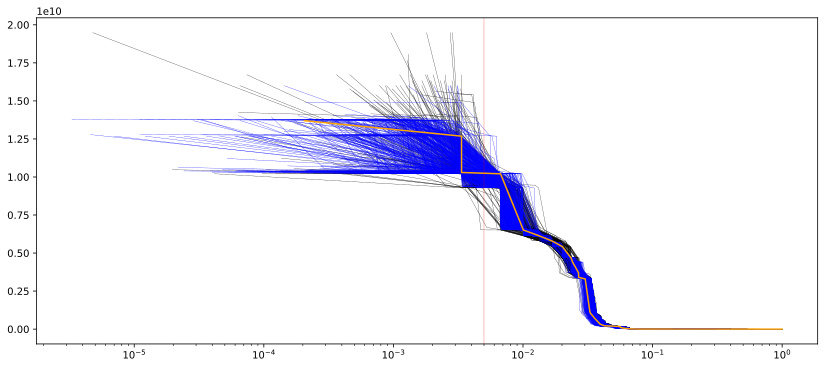

In [35]:
plt.figure(figsize=(14,6))

for pp in par_poiss_50:
    plt.plot(pp.exceedence_prob, pp.loss, 'k', lw=0.25)
    
for pp in par_real_50:
    plt.plot(pp.exceedence_prob, pp.loss, 'b', lw=0.25)
    
plt.plot(real_50_yr_main_exc.exceedence_prob,
         real_50_yr_main_exc.loss,
         'orange')

plt.axvline(1/200, c='r', lw=0.25)

plt.gca().set_xscale('log')

In [30]:
par_poiss_5 = Parallel(n_jobs=-2, verbose=1)(delayed(get_poiss_exceedence)(5,seed=i)
                               for i in range(500))

[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:  5.0min finished


In [31]:
par_real_5 = Parallel(n_jobs=3, verbose=1)(delayed(get_real_exceedence_mc)(5,i)
                                            for i in range(500))

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   39.9s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  6.6min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:  7.5min finished


In [36]:
real_5_yr_main_exc = get_real_exceedence(5)

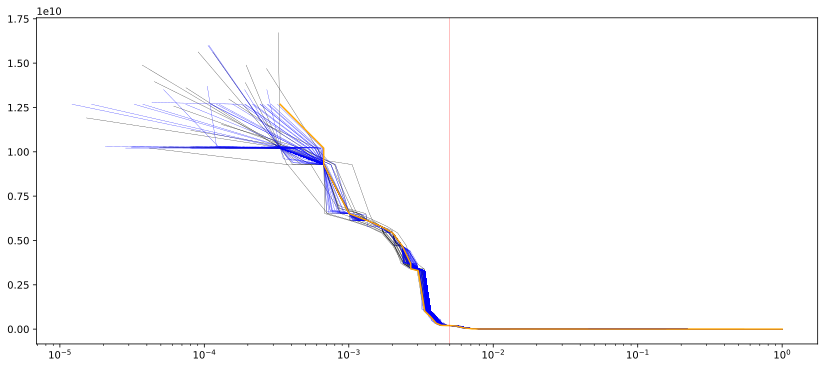

In [37]:
plt.figure(figsize=(14,6))

for pp in par_poiss_5:
    plt.plot(pp.exceedence_prob, pp.loss, 'k', lw=0.25)
    
for pp in par_real_5:
    plt.plot(pp.exceedence_prob, pp.loss, 'b', lw=0.25)
    
plt.plot(real_5_yr_main_exc.exceedence_prob,
         real_5_yr_main_exc.loss,
         'orange')

plt.axvline(1/200, c='r', lw=0.25)

plt.gca().set_xscale('log')

In [59]:
poiss_5_loss = np.hstack([np.float_(pp.loss.values)
                         for pp in par_poiss_5])

real_5_loss = np.hstack([np.float_(pp.loss.values)
                         for pp in par_real_5])

In [57]:
poiss_5_loss.shape

(13612,)

In [58]:
pd.Series(poiss_5_loss).describe()

count    1.361200e+04
mean     2.307326e+09
std      3.082491e+09
min      0.000000e+00
25%      5.511770e+07
50%      2.139120e+08
75%      4.681910e+09
max      1.672132e+10
dtype: float64

In [60]:
pd.Series(real_5_loss).describe()

count    1.379600e+04
mean     2.337532e+09
std      3.100909e+09
min      0.000000e+00
25%      5.511770e+07
50%      2.139120e+08
75%      4.681910e+09
max      1.599864e+10
dtype: float64

In [66]:
pd.Series(np.float_(real_5_yr_main_exc.loss.values)).describe()

count    2.900000e+01
mean     2.571387e+09
std      3.596266e+09
min      0.000000e+00
25%      6.220430e+07
50%      2.139120e+08
75%      4.681910e+09
max      1.268225e+10
dtype: float64

In [65]:
real_50_yr_main_exc.loss

0               0
1     7.20027e+06
2     1.12697e+07
3     1.46259e+07
4      1.6307e+07
5     4.31451e+07
6     5.51177e+07
7     6.22043e+07
8     1.00628e+08
9     1.46208e+08
10    1.72908e+08
11    1.86107e+08
12    2.01326e+08
13    2.04809e+08
14    2.13912e+08
15    3.30701e+08
16    6.85689e+08
17     1.0181e+09
18    1.11873e+09
19     3.2999e+09
20    3.40458e+09
21     3.6991e+09
22    4.38479e+09
23    4.68191e+09
24    5.42228e+09
25    5.78934e+09
26    6.12162e+09
27    6.51202e+09
28    1.02093e+10
29    1.02958e+10
30    1.26822e+10
31    1.37004e+10
Name: loss, dtype: object